# Project: No Show Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction

> The dataset is a collection of information regarding the medical appointments of more than 100k patients in Brazil. Particularly, we would try to understand critical factors that are responsible for whether a patient would show up for their scheduled appointment. The questions we would try answer are 
>1. Does the scheduled day of appointment determines  whether a patient would show up for their appointment or not?
>2. Are patients with critical health(s) condition more likely to show up for their appointment?
>3. Does the neighborhood or location of the hospital a critical factor in patients showing up for their appointment?
>4. Are patients enrolled in the social welfare program more likely to keep their appointment?

In [1]:
# All the necessary packages for this analysis are imported below
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


>### General Properties

In [2]:
# load the dataset
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#this is to check the number of records and characteristics of each records in the dataset. 
df.shape

(110527, 14)

In total, there are 110527 records and 14 attributes in the dataset

In [4]:
#check for missing value(s)
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

The dataset has no missing value

In [5]:
#This is to check for duplicates in the dataset
df.duplicated().sum()

0

The dataset does not have duplicated values, however since we expect AppointmentID to be unique, we would check for duplicated values in this column and possibly drop them.

In [6]:
#checking for duplicates in AppointmentID column
df['AppointmentID'].duplicated().sum()

0

From the above, the AppointmentID and ScheduleDay are formated as string. In the data cleaning section, we shall change them to their appropriate structure which is datetime.

In [7]:
#Here is to investigate the structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
# checking for number of distinct values in each column of the dataset
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

From the above, we see that there are sixty two thousand two hundred and ninty nine patients with one hundred and ten thousand five hundred twenty seven scheduled appointment. Also, there are more than two unique values in the Handcap column instead of two distinct values. We shall also fix this problem in the data cleaning section

In [9]:
#summarize the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


array([[<AxesSubplot:title={'center':'PatientId'}>,
        <AxesSubplot:title={'center':'AppointmentID'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Scholarship'}>,
        <AxesSubplot:title={'center':'Hipertension'}>,
        <AxesSubplot:title={'center':'Diabetes'}>],
       [<AxesSubplot:title={'center':'Alcoholism'}>,
        <AxesSubplot:title={'center':'Handcap'}>,
        <AxesSubplot:title={'center':'SMS_received'}>]], dtype=object)

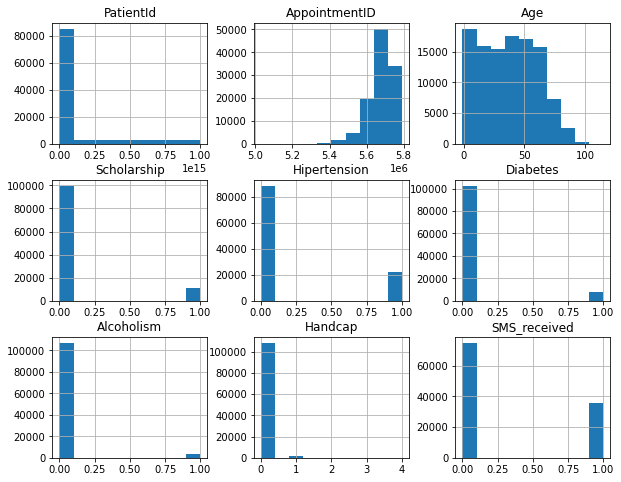

In [10]:
df.hist(figsize=(10,8))

we can see from the summary statistic table that we have negative age which is not realistic. Also we have four distinct values in the handicap column in which they are suppose two, 0 and 1 for 'No' and 'Yes' respectively.

### Data Cleaning 

in this section we shall 
> **1**: drop rows for which the age is negative                                                                                
> **2**: drop rows for which handicap is greater or equal to two                                                                
> **3**: For the purpose of conveniency and for quick understanding, we would rename the "No-show" column to "Show-up" and also modify its content such that **No** would mean the patient **DID NOT** show up for the appointment and **Yes** would mean the patient showed up for the appointment.                                                                                                                
>**4**: Change the structure of AppointmentDay and ScheduleDay from string to Datetime                                                                                                                                                                                                                  
>**5**: Create additional column for month, and day both schedule day and appointment day. 

In [11]:
#this is to drop rows for which age is negative and handicap greater than or equal to 2.
row_id = df[(df["Handcap"]>1)|(df["Age"]<0)].index
df.drop(row_id, inplace=True)

#check up for unique values
df.nunique()

PatientId          62190
AppointmentID     110327
Gender                 2
ScheduledDay      103368
AppointmentDay        27
Age                  103
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                2
SMS_received           2
No-show                2
dtype: int64

Comparing this result with the previous one, we see that the number of age dropped by 1 and handicap dropped by 199 making it a total of 200 records dropped from the dataset.

In [12]:
#Rename the No-show column to Show-up and reverse its encoding. 
df.rename({"No-show":"Show_up"}, axis=1, inplace=True)
df.replace({"Show_up":{"No":"Yes", "Yes":"No"}},inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show_up
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,Yes
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes


In [13]:
#Change AppointmentDay and ScheduledDay from string to datetime.
df["ScheduledDay"] = pd.to_datetime(df["ScheduledDay"])
df["AppointmentDay"] = pd.to_datetime(df["AppointmentDay"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110327 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110327 non-null  float64            
 1   AppointmentID   110327 non-null  int64              
 2   Gender          110327 non-null  object             
 3   ScheduledDay    110327 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110327 non-null  datetime64[ns, UTC]
 5   Age             110327 non-null  int64              
 6   Neighbourhood   110327 non-null  object             
 7   Scholarship     110327 non-null  int64              
 8   Hipertension    110327 non-null  int64              
 9   Diabetes        110327 non-null  int64              
 10  Alcoholism      110327 non-null  int64              
 11  Handcap         110327 non-null  int64              
 12  SMS_received    110327 non-null  int64              
 13  Show_up       

In [14]:
#Feature engineering
df["Scheduled_Day"] = df["ScheduledDay"].dt.day
df["Scheduled_Month"] = df["ScheduledDay"].dt.month
df["Appointment_Day"] = df["AppointmentDay"].dt.day
df["Appointment_Month"] = df["AppointmentDay"].dt.month

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show_up,Scheduled_Day,Scheduled_Month,Appointment_Day,Appointment_Month
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes,29,4,29,4
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes,29,4,29,4
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,Yes,29,4,29,4
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes,29,4,29,4
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes,29,4,29,4


<a id='eda'></a>
## Exploratory Data Analysis

>### Research Question 1: How many appointments were kept?

Number of appointments patients showed up for: 88049


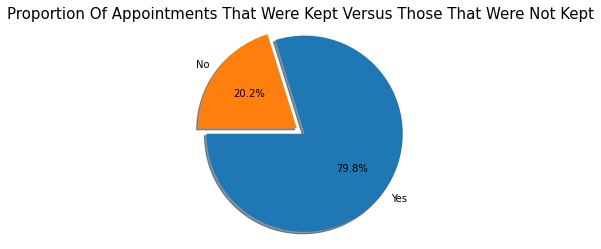

In [16]:
#Number of appointments that were kept to those that were not
print("Number of appointments patients showed up for: {}".format(df.Show_up.value_counts()[0]))
labels = list(dict(df.Show_up.value_counts()))
sizes = list(dict(df.Show_up.value_counts()).values())
explode = (0,0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, 
        labels=labels, 
        autopct='%1.1f%%',
        shadow=True, 
        startangle=180)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Proportion Of Appointments That Were Kept Versus Those That Were Not Kept", fontsize = 15)
plt.show();

#### **Finding**: from the foregoing, patients showed up for approximately 80% of the time an appointment was scheduled.

>**Finding:** Patients who are enrolled in the Brasilian social Welfare Program seems to be more likely to keep their appointment. 

>### Research Question 2: Which month is a patient is mostly like to show up for their appointment?

In [24]:
def bar_plots(x, data, title):
    """
    this fuctions is used to visualize the data in a bar chart.
    the variable x is the attribute of the data to be visualize
    the variable title is the title of the visualisation
    """
    sns.set_context('paper')
    sns.set(rc = {'figure.figsize':(8,6)})
    sns.countplot(x=x, hue="Show_up", data=data, palette="magma")
    plt.title(title, fontsize = 15)
    plt.show()
    
def month(x):
    """The function compares the schedules and or appointments kept per month versus
        those that were not kept.
    """
    appointment = pd.crosstab(df[x], df['Show_up'])
    appointment_ave = appointment.div(appointment.sum(1).array, axis=0).mul(100).round(2).add_suffix("_Avg(%)")
    df_comb_app = pd.concat((appointment, appointment_ave), axis=1)
    df_comb_app["Total"] = df_comb_app["No"] + df_comb_app["Yes"]
    return df_comb_app
    

Show_up               No    Yes  No_Avg(%)  Yes_Avg(%)  Total
Appointment_Month                                            
4                    633   2594      19.62       80.38   3227
5                  16767  63927      20.78       79.22  80694
6                   4878  21528      18.47       81.53  26406


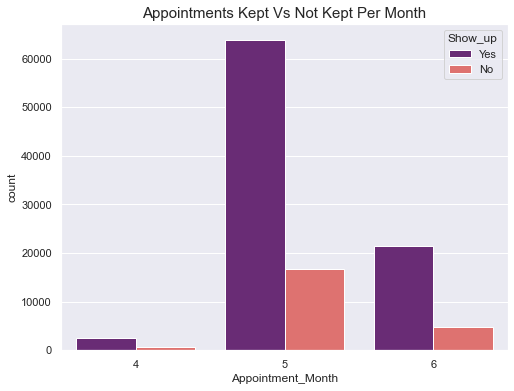

In [25]:
print(month("Appointment_Month"))
bar_plots("Appointment_Month", data=df, title="Appointments Kept Vs Not Kept Per Month")

Show_up             No    Yes  No_Avg(%)  Yes_Avg(%)  Total
Scheduled_Month                                            
1                   18     42      30.00       70.00     60
2                   81    199      28.93       71.07    280
3                 1194   2414      33.09       66.91   3608
4                 7834  17465      30.97       69.03  25299
5                11749  55546      17.46       82.54  67295
6                 1383  12340      10.08       89.92  13723
11                   0      1       0.00      100.00      1
12                  19     42      31.15       68.85     61


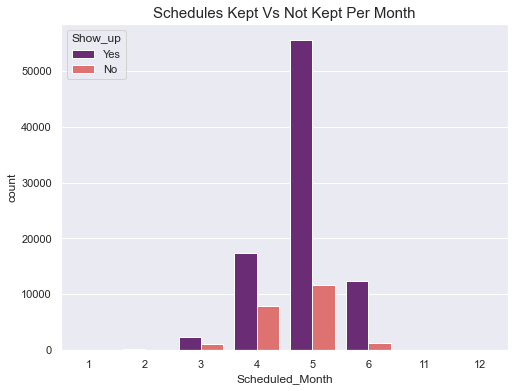

In [26]:
print(month("Scheduled_Month"))
bar_plots("Scheduled_Month", data=df, title="Schedules Kept Vs Not Kept Per Month")

**Finding:** the month of May records the highest number of appointments that were kept by patients. followed by the month of June. Hence patients are more likely to show up for their appointment if they are scheduled within these months. 

### Research Question 3 : Are patients who are enrolled in the Brasilian social welfare program more likely to show up for their appointment ?

In [28]:
#Lets get the total number of patients on scholarship and the number of scheduled appointment
df_scholarship = df[df["Scholarship"]==1]
print("Number of patients enrolled in the Brasilian social welfare scheme: {}".format(df_scholarship.PatientId.nunique()))
print("The number of schedules setup by patients under scholarship: {}".format(df_scholarship.shape[0]))

Number of patients enrolled in the Brasilian social welfare scheme: 5776
The number of schedules setup by patients under scholarship: 10843


Yes    8266
No     2577
Name: Show_up, dtype: int64


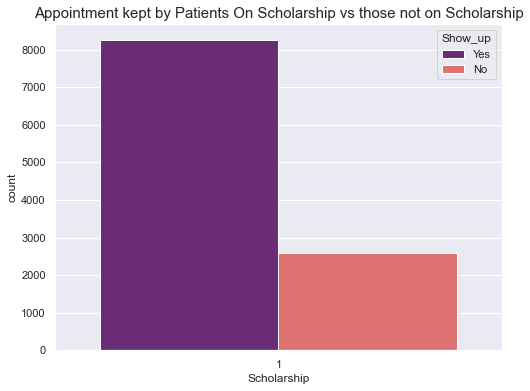

In [31]:
#find the number of appointment that were kept and the 
print(df_scholarship.Show_up.value_counts())
bar_plots("Scholarship", data=df_scholarship, title="Appointment kept by Patients On Scholarship vs those not on Scholarship" )

>**Finding:** Patients who are enrolled in the Brasilian social Welfare Program seems to be more likely to keep their appointment. 

### Research Question 4 : Does a particular health condition (hypertension, diabetes, being handicap, or being alcoholic) increase the chances that a patient would show up or not show up for his/her appointment

In [34]:
#The following function prints the total number of scheduled appointments of each peculiar health condition and 
#The number of appointments they showed up for. 
def print_(x):
    if x == "Hipertension": j = "hypertensive"
    elif x == "Diabetes": j = "diabetic"
    elif x == "Alcoholism": j = "alcoholic"
    else: j = "handicapped"
    
    print("Number of sheduled appointments for " + j +" patients: {}, in which {} where kept and {} were not."
      .format(df[x].value_counts()[1], df.groupby(x)["Show_up"].value_counts()[1][0],
      df.groupby(x)["Show_up"].value_counts()[1][1]))

Number of sheduled appointments for hypertensive patients: 21716, in which 17968 where kept and 3748 were not.


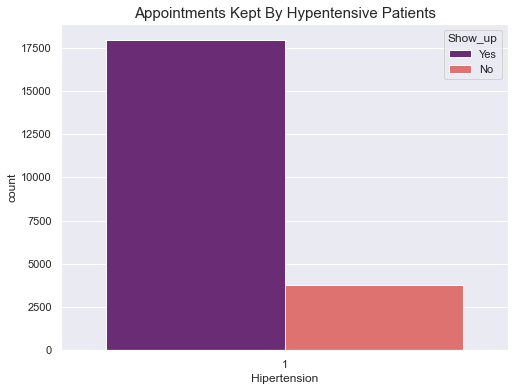

In [35]:
#Printing and visualizing the number of scheduled appointment for Hypertensive patients.
print_("Hipertension")
bar_plots("Hipertension", data=df[df["Hipertension"]==1], title="Appointments Kept By Hypentensive Patients")

Number of sheduled appointments for hypertensive patients: 21716, in which 17968 where kept and 3748 were not.


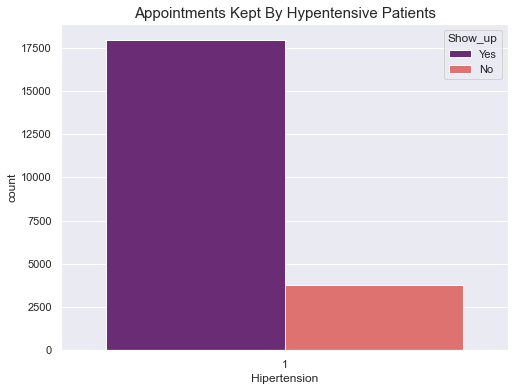

In [36]:
#Printing and visualizing the number of scheduled appointment for Hypertensive patients.
print_("Hipertension")
bar_plots("Hipertension", data=df[df["Hipertension"]==1], title="Appointments Kept By Hypentensive Patients")

Number of sheduled appointments for diabetic patients: 7900, in which 6478 where kept and 1422 were not.


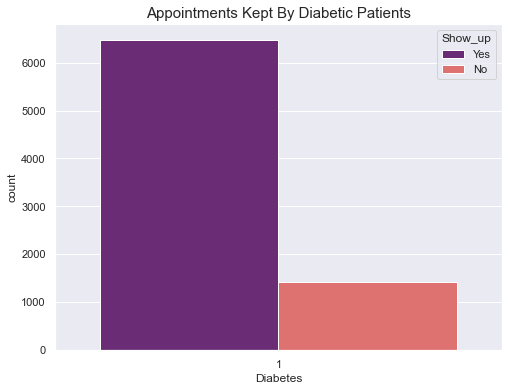

In [37]:
#Printing and visualizing the number of scheduled appointment for Diabetic patients.
print_("Diabetes")
bar_plots("Diabetes", data=df[df["Diabetes"]==1], title="Appointments Kept By Diabetic Patients")

Number of sheduled appointments for alcoholic patients: 3352, in which 2677 where kept and 675 were not.


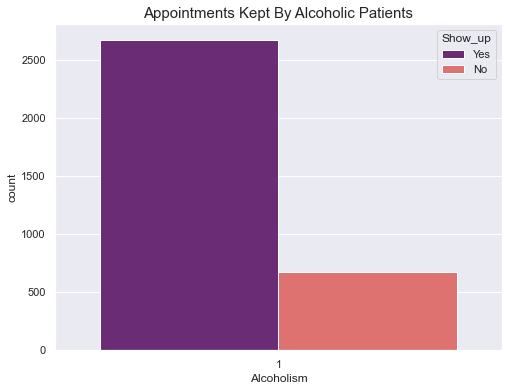

In [38]:
#Printing and visualizing the number of scheduled appointment for alcoholic patients.
print_("Alcoholism")
bar_plots("Alcoholism", data=df[df["Alcoholism"]==1], title="Appointments Kept By Alcoholic Patients")

Number of sheduled appointments for handicapped patients: 2042, in which 1676 where kept and 366 were not.


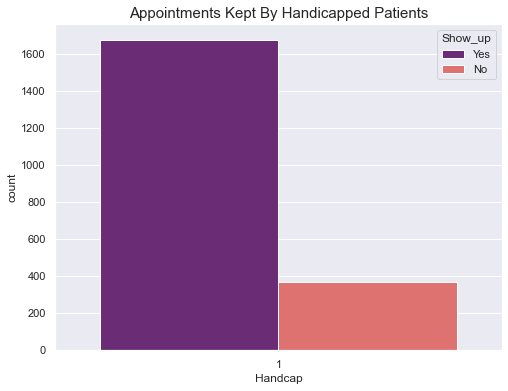

In [39]:
print_("Handcap")
bar_plots("Handcap", data=df[df["Handcap"]==1], title="Appointments Kept By Handicapped Patients")

>**Finding:** Patients with one or more critical health condition as seen above are generally more likely to show up for their appointments. However, Hypertensive patients are more likely to show up for their appointments compare to other patient. 